In [199]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [404]:
# read in data
data = pd.read_csv('../datasets/train_clean_final.csv')

In [405]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [406]:
# Remove Unnamed column
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [422]:
data.dtypes

id                        int64
lot_frontage            float64
overall_qual              int64
bsmtfin_sf_1            float64
total_bsmt_sf           float64
1st_flr_sf                int64
gr_liv_area               int64
full_bath                 int64
totrms_abvgrd             int64
fireplaces                int64
garage_area             float64
saleprice                 int64
porch_sf                  int64
house_remod_sold          int64
house_age_sold            int64
kitchen_qual_Fa           int64
kitchen_qual_Gd           int64
kitchen_qual_TA           int64
neighborhood_Blueste      int64
neighborhood_BrDale       int64
neighborhood_BrkSide      int64
neighborhood_ClearCr      int64
neighborhood_CollgCr      int64
neighborhood_Crawfor      int64
neighborhood_Edwards      int64
neighborhood_Gilbert      int64
neighborhood_Greens       int64
neighborhood_IDOTRR       int64
neighborhood_MeadowV      int64
neighborhood_Mitchel      int64
neighborhood_NAmes        int64
neighbor

### Preliminary modelling: Linear Regression
Lets see how our model does with the features we have! We will begin with Linear Regression

In [407]:
data.head()

,id,lot_frontage,overall_qual,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,fireplaces,garage_area,saleprice,porch_sf,house_remod_sold,house_age_sold,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,109,72.774648,6,533.0,725.0,725,1479,2,6,0,475.0,130500,44,5,34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,43.000000,7,637.0,913.0,913,2122,2,8,1,559.0,220000,74,12,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,68.000000,5,731.0,1057.0,1057,1057,1,5,0,246.0,109000,52,3,57,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,73.000000,5,0.0,384.0,744,1444,2,7,0,400.0,174000,100,3,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,82.000000,6,0.0,676.0,831,1445,2,6,0,484.0,138500,59,17,110,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [408]:
# Define X and y and train test split
X = data.drop(columns=['id', 'saleprice'])
y = data['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21)

In [409]:
# calculate RMSE using mean saleprice as prediction. This will serve as our baseline RMSE
sale_mean = np.mean(data['saleprice'])
sse = np.sum((y - y_mean)**2)
mse = sse / X.shape[0]
rmse = np.sqrt(mse)
rmse

79084.7282422884

In [410]:
# Instantiate, fit and score our model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Train score
print(f'train r-squared score: {lr.score(X_train, y_train)}')
# Test score
print(f'test r-squared score: {lr.score(X_test, y_test)}')

train r-squared score: 0.8564070952655459
test r-squared score: 0.8435637168940797


In [411]:
# Print RMSE
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds, squared=False)
print(f'RMSE is {mse}')

RMSE is 31788.70798413741


In [413]:
# create coefficient DataFrame
coef_df = pd.DataFrame()
coef_df['features'] = X_train.columns
coef_df['coefficients'] = lr.coef_
coef_df

,features,coefficients
0,lot_frontage,-37.781472
1,overall_qual,11809.596970
2,bsmtfin_sf_1,14.450932
3,total_bsmt_sf,9.119645
4,1st_flr_sf,11.008691
5,gr_liv_area,30.507814
6,full_bath,-1697.390239
7,totrms_abvgrd,1919.754094
8,fireplaces,8366.165450
9,garage_area,37.571865


### Cross Validation

In [351]:
# Cross val score on our Linear Regression model
train_cval = cross_val_score(lr, X_train, y_train, cv=5).mean()
test_cval = cross_val_score(lr, X_test, y_test, cv=5).mean()
print(f'5 fold cross validation for train set: {train_cval}')
print(f'5 fold cross validation for test set: {test_cval}')

5 fold cross validation for train set: 0.8250506169374155
5 fold cross validation for test set: 0.7380542487250036


In [352]:
# take a look at coefficients of model
pd.DataFrame(list(zip(lr.coef_, X_train.columns)))

,0,1
0,-37.781472,lot_frontage
1,11809.596970,overall_qual
2,14.450932,bsmtfin_sf_1
3,9.119645,total_bsmt_sf
4,11.008691,1st_flr_sf
5,30.507814,gr_liv_area
6,-1697.390239,full_bath
7,1919.754094,totrms_abvgrd
8,8366.165450,fireplaces
9,37.571865,garage_area


A table of Linear Regression coefficiets is seen above. Since value ranges for the features vary wildly, I would expect coefficients to vary as well. features that range from 1-10 have high coefficients while features that range in the 100s or 1000s have lower coefficients.

### Linear Regression without dummy columns
Our model seems somewhat overfit to the training data. Lets try modelling without the OHE columns to see if they were actually useful

In [353]:
# Define X and y and train test split
X = data.iloc[:,0:17]
X = X.drop(columns=['id', 'saleprice'])
y = data['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21)

In [354]:
# Instantiate, fit and score our model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Train score
print(f'train r-squared score: {lr.score(X_train, y_train)}')
# Test score
print(f'test r-squared score: {lr.score(X_test, y_test)}')

train r-squared score: 0.816600111705712
test r-squared score: 0.7816407726236075


In [355]:
# Cross val score on our most recently fitted model
train_cval = cross_val_score(lr, X_train, y_train, cv=5).mean()
test_cval = cross_val_score(lr, X_test, y_test, cv=5).mean()
print(f'5 fold cross validation for train set: {train_cval}')
print(f'5 fold cross validation for test set: {test_cval}')

5 fold cross validation for train set: 0.7926624280691669
5 fold cross validation for test set: 0.6629551427692493


In [356]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds, squared=False)
print(f'RMSE is {mse}')

RMSE is 37556.91463515988


R2 scores and RMSE got worse. Looks like the OHE columns are helpful! Thats good news. Lets try scaling and other kinds of models

### Standard Scaling

In [414]:
# Define X and y and train test split
X = data.drop(columns=['id', 'saleprice'])
y = data['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21)

In [415]:
# Scale our data.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [416]:
# Try our model on scaled data
# Instantiate and fit our model
lr = LinearRegression()
lr.fit(Z_train, y_train)

# Cross val score on our most recently fitted model
train_cval = cross_val_score(lr, Z_train, y_train, cv=5).mean()
test_cval = cross_val_score(lr, Z_test, y_test, cv=5).mean()
print(f'5 fold cross validation for train set: {train_cval}')
print(f'5 fold cross validation for test set: {test_cval}')

5 fold cross validation for train set: 0.8250506169374037
5 fold cross validation for test set: 0.7380542487250115


In [417]:
train_score = lr.score(Z_train, y_train)
test_score = lr.score(Z_test, y_test)
print(f'Train R2 is {train_score} and test R2 is {test_score}')

Train R2 is 0.8564070952655458 and test R2 is 0.8435637168940588


In [418]:
# generate predictions and print RMSE
y_preds = lr.predict(Z_test)
mse = mean_squared_error(y_test, y_preds, squared=False)
print(f'RMSE is {mse}')

RMSE is 31788.707984139535


In [420]:
# create coefficient DataFrame
coef_df_sc = pd.DataFrame()
coef_df_sc['features'] = X_train.columns
coef_df_sc['coefficients'] = lr.coef_
coef_df_sc

,features,coefficients
0,lot_frontage,-845.413139
1,overall_qual,16711.386337
2,bsmtfin_sf_1,6632.662988
3,total_bsmt_sf,4020.537142
4,1st_flr_sf,4263.242046
5,gr_liv_area,14863.247830
6,full_bath,-928.108282
7,totrms_abvgrd,2990.599868
8,fireplaces,5465.336327
9,garage_area,8025.892105


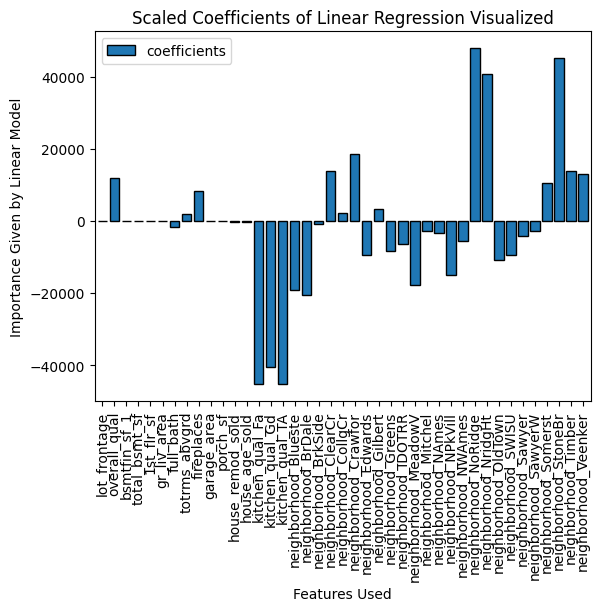

In [435]:
# Visualize coefficients
coef_df.plot(x='features', y='coefficients', kind='bar', width=0.8, edgecolor='black')
plt.ylabel('Importance Given by Linear Model')
plt.xlabel('Features Used')

plt.title('Scaled Coefficients of Linear Regression Visualized');

A table of sclaed coefficients is seen above. These vary much less than the original coefficents, typically ranging from 200 to 5000 depending on the importance of the feature

### Ridge Regression

In [362]:
# cross validate ridge regression over a range of alphas
alphas = np.logspace(1, 3, 100)
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=5)
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([  10.        ,   10.47615753,   10.97498765,   11.49756995,
         12.0450354 ,   12.61856883,   13.21941148,   13.84886371,
         14.50828778,   15.19911083,   15.92282793,   16.68100537,
         17.475284  ,   18.3073828 ,   19.17910262,   20.09233003,
         21.04904145,   22.0513074 ,   23.101297  ,   24.20128265,
         25.35364494,   26.56087783,   27.82559402,   29.15053063,
         30.53855509,   31.99267138,   33.51602651,   35.11191734,
         36.7837...
        284.80358684,  298.36472403,  312.57158497,  327.45491629,
        343.04692863,  359.38136638,  376.49358068,  394.42060594,
        413.20124001,  432.87612811,  453.48785081,  475.08101621,
        497.70235643,  521.4008288 ,  546.22772177,  572.23676594,
        599.48425032,  628.02914418,  657.93322466,  689.26121043,
        722.08090184,  756.46332755,  792.48289835,  830.21756813,
        869.74900262,  911.16275612,  954.54845666, 1000.        ]),
        cv=5, scoring='r2

In [363]:
# print optimal ridge alpha value
ridge_cv.alpha_

141.74741629268047

In [364]:
# print R2 scores
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.852714361073275
0.8360564300293003


In [376]:
# fit ridge model with optimal alpha
ridge = Ridge(alpha = 141.74741629268047)
ridge.fit(Z_train, y_train)

Ridge(alpha=141.74741629268047)

In [377]:
# print R2 scores
print(ridge.score(Z_train, y_train))
print(ridge.score(Z_test, y_test))

0.852714361073275
0.8360564300293003


In [378]:
# Cross val score on our Ridge Regression model
train_cval = cross_val_score(ridge, Z_train, y_train, cv=5).mean()
test_cval = cross_val_score(ridge, Z_test, y_test, cv=5).mean()
print(f'5 fold cross validation for train set: {train_cval}')
print(f'5 fold cross validation for test set: {test_cval}')

5 fold cross validation for train set: 0.8295390278890131
5 fold cross validation for test set: 0.7659535855955367


In [379]:
# print RMSE
y_preds = ridge.predict(Z_test)
mse = mean_squared_error(y_test, y_preds, squared=False)
print(f'RMSE is {mse}')

RMSE is 32542.530943875943


### Lasso Regression

In [369]:
# cross validate ridge regression over a range of alphas
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=21, max_iter=10000)
lasso_cv.fit(Z_train, y_train)

LassoCV(alphas=array([  10.        ,   10.47615753,   10.97498765,   11.49756995,
         12.0450354 ,   12.61856883,   13.21941148,   13.84886371,
         14.50828778,   15.19911083,   15.92282793,   16.68100537,
         17.475284  ,   18.3073828 ,   19.17910262,   20.09233003,
         21.04904145,   22.0513074 ,   23.101297  ,   24.20128265,
         25.35364494,   26.56087783,   27.82559402,   29.15053063,
         30.53855509,   31.99267138,   33.51602651,   35.11191734,
         36.7837...
        284.80358684,  298.36472403,  312.57158497,  327.45491629,
        343.04692863,  359.38136638,  376.49358068,  394.42060594,
        413.20124001,  432.87612811,  453.48785081,  475.08101621,
        497.70235643,  521.4008288 ,  546.22772177,  572.23676594,
        599.48425032,  628.02914418,  657.93322466,  689.26121043,
        722.08090184,  756.46332755,  792.48289835,  830.21756813,
        869.74900262,  911.16275612,  954.54845666, 1000.        ]),
        cv=5, max_iter=10

In [370]:
# print the optimal value of alpha
lasso_cv.alpha_

572.236765935022

In [371]:
# print lassocv r2 scores
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.8539352394155516
0.839094472374657


In [380]:
# fit lasso with optimal alpha
lasso = Lasso(alpha=572.236765935022)
lasso.fit(Z_train, y_train)

Lasso(alpha=572.236765935022)

In [381]:
# print R2 scores
print(lasso.score(Z_train, y_train))
print(lasso.score(Z_test, y_test))

0.8539352394155516
0.839094472374657


In [382]:
# generate predictions and print RMSE
y_preds = lasso.predict(Z_test)
mse = mean_squared_error(y_test, y_preds, squared=False)
print(f'RMSE is {mse}')

RMSE is 32239.597743145936


In [383]:
# Cross val score on our lasso regression model
train_cval = cross_val_score(lasso, Z_train, y_train, cv=5).mean()
test_cval = cross_val_score(lasso, Z_test, y_test, cv=5).mean()
print(f'5 fold cross validation for train set: {train_cval}')
print(f'5 fold cross validation for test set: {test_cval}')

5 fold cross validation for train set: 0.8275811798509569
5 fold cross validation for test set: 0.7477351987098607


### Interpretation
Our best cross-validated R2 score pf 0.76 on the test set was obtained from ridge regression, however, our lowest RMSE was obtained from regular Linear Regression. All three will be used to predict values from test.csv, and will be revisited depending on the results